In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = False

attn = np.load('../2024/20241023_attn.npy')
lab = np.load('../2024/20241023_lab.npy')
bands = np.load('../bands.npy')

attn_clear = attn[lab==0]
attn_cloud = attn[lab==1]

print(attn_clear.shape)
print(attn_cloud.shape)

def drop_banddef(
        banddef,
        wls=[381.0055, 388.4092, 395.8158, 403.2254, 
            1275.339, 1282.794, 1290.25, 1297.705, 1305.16, 1312.614, 1320.068,
            2455.994, 2463.381, 2470.767, 2478.153, 2485.538, 2492.923]):

    dropbands = []
    for wl in wls:
        deltas = np.abs(banddef - wl)
        dropbands.append(np.argmin(deltas))
    
    banddef = np.delete(banddef, dropbands, axis=0)

    return banddef

bands = drop_banddef(bands)

(1731606, 268)
(1642181, 268)


In [2]:
mean_attn_cloud = np.mean(attn_cloud, axis=0)
mean_attn_clear = np.mean(attn_clear, axis=0)

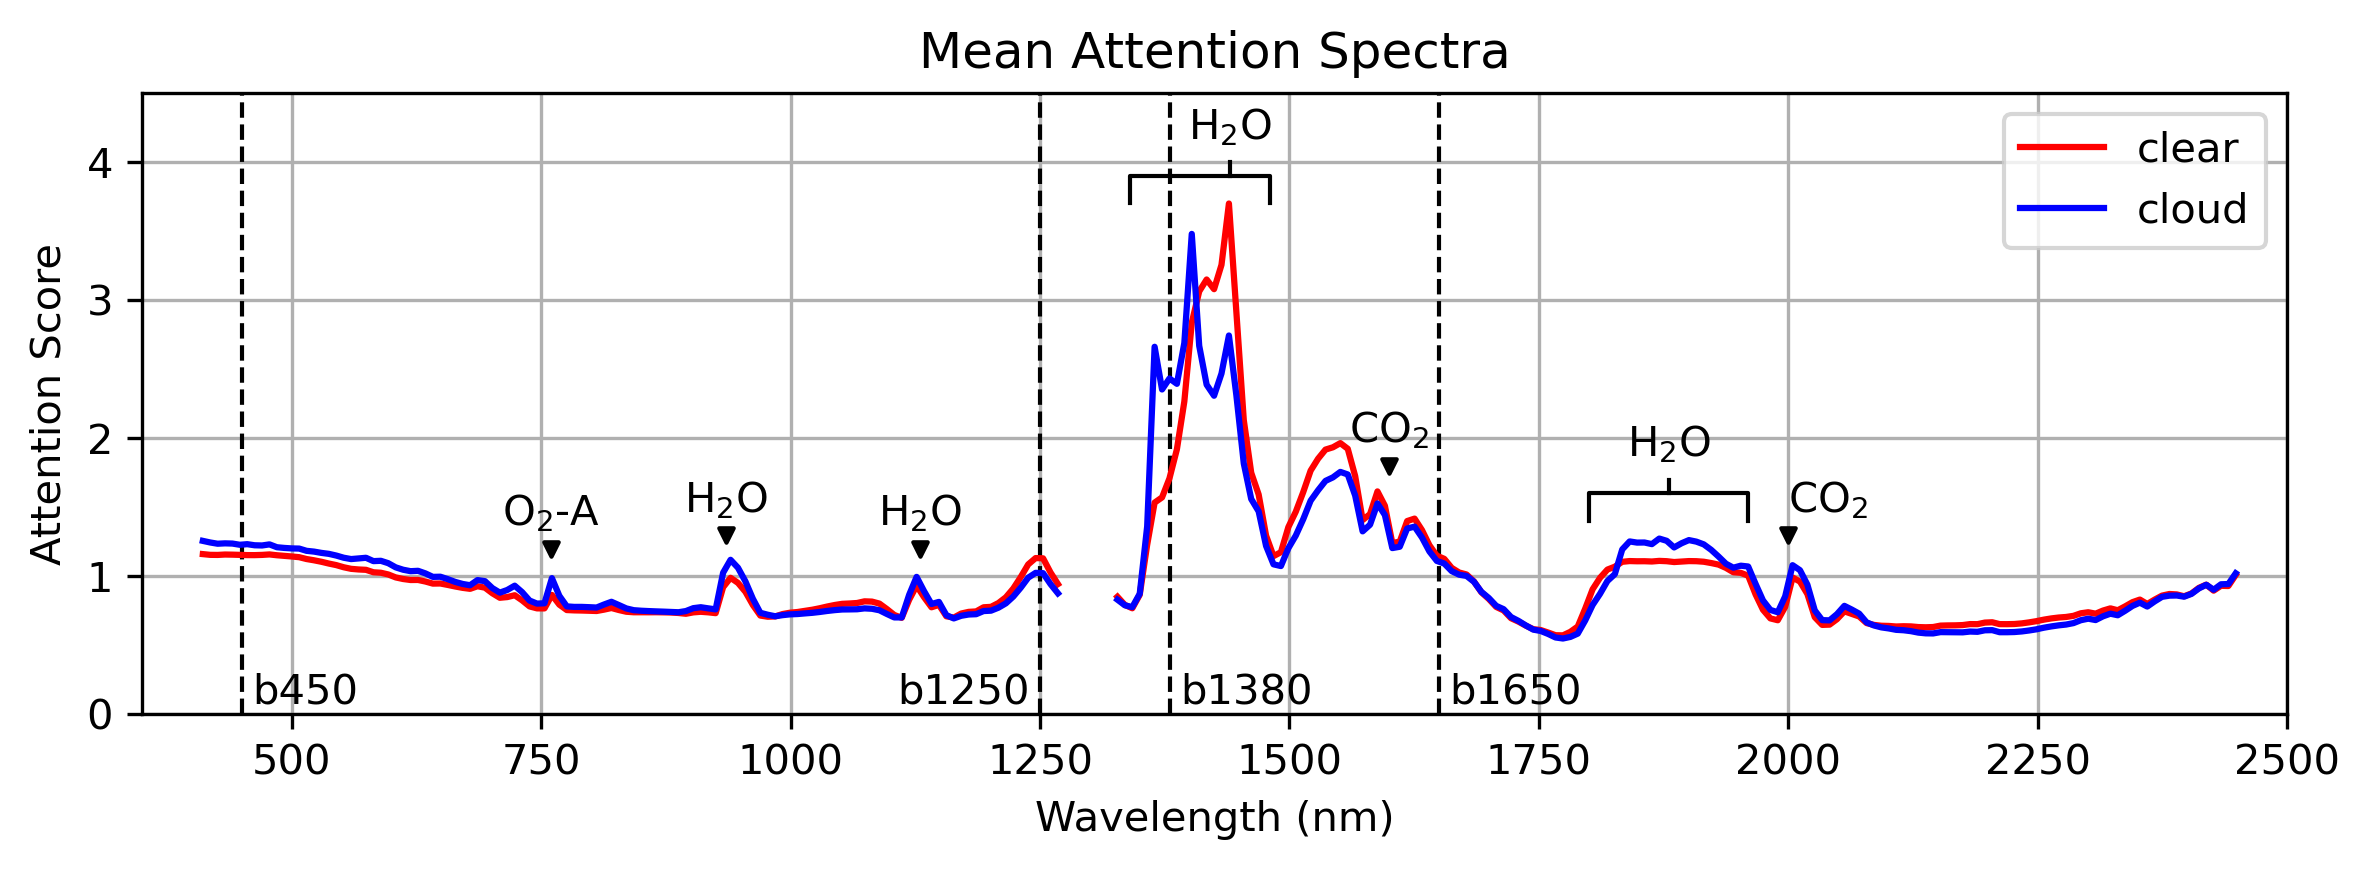

In [3]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=300)

ax.plot([450, 450], [0, 4.5], c='k', linestyle='--', linewidth=1)
ax.text(460, 0.3, 'b450', color='k', fontsize=10, verticalalignment='top')

ax.plot([1250, 1250], [0, 4.5], c='k', linestyle='--', linewidth=1)
ax.text(1240, 0.3, 'b1250', color='k', fontsize=10, verticalalignment='top', horizontalalignment='right')

ax.plot([1380, 1380], [0, 4.5], c='k', linestyle='--', linewidth=1)
ax.text(1390, 0.3, 'b1380', color='k', fontsize=10, verticalalignment='top')

ax.plot([1650, 1650], [0, 4.5], c='k', linestyle='--', linewidth=1)
ax.text(1660, 0.3, 'b1650', color='k', fontsize=10, verticalalignment='top')

# ax.plot([760, 760], [0, 4.5], c='b', linestyle=':', linewidth=1)
# ax.text(770, 4.4, '$O_2$-A', color='b', fontsize=10, verticalalignment='top')
ax.scatter([760], [1.2], c='k', marker='v', s=12)
ax.text(760, 1.3, 'O$_2$-A', color='k', fontsize=10, verticalalignment='bottom', horizontalalignment='center')

# ax.plot([935, 935], [0, 4.5], c='b', linestyle=':', linewidth=1)
# ax.text(945, 4.4, r'$\rho\alpha\tau$', color='b', fontsize=10, verticalalignment='top')
ax.scatter([935], [1.3], c='k', marker='v', s=12)
ax.text(935, 1.4, r'H$_2$O', color='k', fontsize=10, verticalalignment='bottom', horizontalalignment='center')

# ax.plot([1130, 1130], [0, 4.5], c='b', linestyle=':', linewidth=1)
# ax.text(1140, 4.4, '$\phi$', color='b', fontsize=10, verticalalignment='top')
ax.scatter([1130], [1.2], c='k', marker='v', s=12)
ax.text(1130, 1.3, r'H$_2$O', color='k', fontsize=10, verticalalignment='bottom', horizontalalignment='center')

# ax.plot([1440, 1440], [0, 4.5], c='b', linestyle=':', linewidth=1)
# ax.text(1460, 4.4, '$H_2O$', color='b', fontsize=10, verticalalignment='top')
#ax.scatter([1440], [3.9], c='k', marker='v', s=12)
ax.plot([1340, 1340, 1480, 1480], [3.7, 3.9, 3.9, 3.7], color='k', linewidth=1)
ax.plot([1440, 1440], [3.9, 4.0], color='k', linewidth=1)
ax.text(1440, 4.1, r'H$_2$O', color='k', fontsize=10, verticalalignment='bottom', horizontalalignment='center')

# ax.plot([1600, 1600], [0, 4.5], c='b', linestyle=':', linewidth=1)
# ax.text(1610, 4.4, '$CO_2$', color='b', fontsize=10, verticalalignment='top')
ax.scatter([1600], [1.8], c='k', marker='v', s=12)
ax.text(1600, 1.9, r'CO$_2$', color='k', fontsize=10, verticalalignment='bottom', horizontalalignment='center')

#ax.scatter([1880], [1.4], c='k', marker='v', s=12)
ax.plot([1800, 1800, 1960, 1960], [1.4, 1.6, 1.6, 1.4], color='k', linewidth=1)
ax.plot([1880, 1880], [1.6, 1.7], color='k', linewidth=1)
ax.text(1880, 1.8, r'H$_2$O', color='k', fontsize=10, verticalalignment='bottom', horizontalalignment='center')

# ax.plot([2000, 2000], [0, 4.5], c='b', linestyle=':', linewidth=1)
# ax.text(2010, 4.3, '$CO_2$', color='b', fontsize=10, verticalalignment='top')
ax.scatter([2000], [1.3], c='k', marker='v', s=12)
ax.text(2000, 1.4, r'CO$_2$', color='k', fontsize=10, verticalalignment='bottom', horizontalalignment='left')

ax.set_title('Mean Attention Spectra')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Attention Score')

ax.set_ylim(0, 4.5)
ax.set_xlim(350, 2500)

ax.plot(bands[:116], mean_attn_clear[:116], c='r', label='clear')
ax.plot(bands[116:], mean_attn_clear[116:], c='r')

ax.plot(bands[:116], mean_attn_cloud[:116], c='b', label='cloud')
ax.plot(bands[116:], mean_attn_cloud[116:], c='b')

ax.set_axisbelow(True)

ax.grid(True, linestyle='-')

ax.legend()

fig.tight_layout()



fig.savefig('Fig3c.png', dpi=300)